# 🧼 Titanic Data Cleaning and Preprocessing Tutorial

In this tutorial, we'll clean and preprocess the Titanic dataset step by step using Python and Pandas. This includes:

- Handling missing values (Cleaning)
- Removing duplicates (Cleaning)
- Fixing data types and inconsistencies (Cleaning)
- Encoding categorical variables  (Preprocessing)
- Visualize the data (Preprocessing)
- Removing outliers using IQR (Preprocessing)
- Handling skewness  (Preprocessing)
- Scaling numeric features (Preprocessing)
- Feature selection (Preprocessing)
- Handle imbalanced data (Preprocessing)
- Splitting the data (Preprocessing)

Let's begin!

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.feature_selection import SelectKBest, f_classif


In [2]:
# Load Titanic dataset
df = pd.read_csv("titanic.csv")
df.head()

PassengerId                                               Name  Pclass  \
0            1                            Braund, Mr. Owen Harris       3   
1            2  Cumings, Mrs. John Bradley (Florence Briggs Th...       1   
2            3                             Heikkinen, Miss. Laina       3   
3            4       Futrelle, Mrs. Jacques Heath (Lily May Peel)       1   
4            5                           Allen, Mr. William Henry       3   

      Sex   Age  SibSp  Parch            Ticket     Fare Cabin Embarked  \
0    male  22.0      1      0         A/5 21171   7.2500   NaN        S   
1  female  38.0      1      0          PC 17599  71.2833   C85        C   
2  female  26.0      0      0  STON/O2. 3101282   7.9250   NaN        S   
3  female  35.0      1      0            113803  53.1000  C123        S   
4    male  35.0      0      0            373450   8.0500   NaN        S   

   Survived  
0         0  
1         1  
2         1  
3         1  
4         0

## 🔍 Initial Exploration

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  892 non-null    int64  
 1   Name         892 non-null    object 
 2   Pclass       892 non-null    int64  
 3   Sex          892 non-null    object 
 4   Age          715 non-null    float64
 5   SibSp        892 non-null    int64  
 6   Parch        892 non-null    int64  
 7   Ticket       892 non-null    object 
 8   Fare         892 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     890 non-null    object 
 11  Survived     892 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 83.8+ KB


In [4]:
df.describe(include='all')


PassengerId                 Name      Pclass   Sex         Age  \
count    892.000000                  892  892.000000   892  715.000000   
unique          NaN                  891         NaN     6         NaN   
top             NaN  Dooley, Mr. Patrick         NaN  male         NaN   
freq            NaN                    2         NaN   576         NaN   
mean     446.498879                  NaN    1.186099   NaN   29.551287   
std      257.640579                  NaN   33.536705   NaN   14.822069   
min        1.000000                  NaN -999.000000   NaN  -54.000000   
25%      223.750000                  NaN    2.000000   NaN   20.000000   
50%      446.500000                  NaN    3.000000   NaN   28.000000   
75%      669.250000                  NaN    3.000000   NaN   38.000000   
max      891.000000                  NaN    3.000000   NaN   80.000000   

             SibSp       Parch  Ticket        Fare    Cabin Embarked  \
count   892.000000  892.000000     892  892.000000      204      890   
unique         NaN         NaN     681         NaN      147        3   
top            NaN         NaN  347082         NaN  B96 B98        S   
freq           NaN         NaN       7         NaN        4      644   
mean      0.522422    0.381166     NaN   32.176793      NaN      NaN   
std       1.102264    0.805706     NaN   49.672283      NaN      NaN   
min       0.000000    0.000000     NaN    0.000000      NaN      NaN   
25%       0.000000    0.000000     NaN    7.895800      NaN      NaN   
50%       0.000000    0.000000     NaN   14.454200      NaN      NaN   
75%       1.000000    0.000000     NaN   31.000000      NaN      NaN   
max       8.000000    6.000000     NaN  512.329200      NaN      NaN   

          Survived  
count   892.000000  
unique         NaN  
top            NaN  
freq           NaN  
mean      0.383408  
std       0.486489  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       1.000000  
max       1.000000

there's incorrect value in `Age`

In [5]:
df.shape

(892, 12)

In [6]:
688/892

0.7713004484304933

In [7]:
df.isnull().sum()

PassengerId      0
Name             0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          688
Embarked         2
Survived         0
dtype: int64

## 🚫 Remove Duplicates

In [8]:
# Check for null values
df.duplicated().sum()

1

In [9]:
#df = df.drop_duplicates()
df.drop_duplicates(inplace=True)

## 🕳️ Handle Missing Values

🎯 **Purpose:** Missing values can cause errors or bias in our models, so we need to handle them appropriately.

🔧 **What we used:**  
- `.isna().sum()` to detect missing values  
- `fillna()` with mean, median, or mode to impute missing data

🧠 **Why this is useful:**  
Models cannot handle NaN values. Imputation helps maintain data integrity without removing rows.

🛠️ **Other options:**  
- **Mean** imputation → when the data is symmetric and has no outliers  
- **Median** imputation → better when data is skewed or has outliers  
- **Mode** imputation → used for **categorical** features like `Embarked`  
- **Advanced methods**:
  - `KNNImputer` (neighbors-based)
  - `IterativeImputer` (regression-based)
  - Dropping rows/columns if missingness is too high


In [10]:
l1 = [1,5,7,3,4,6,9,10,1000000]
print(np.mean(l1),np.median(l1))


111116.11111111111 6.0


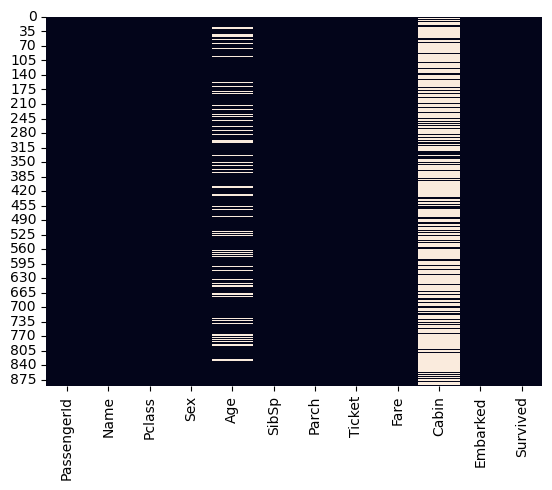

In [11]:
sns.heatmap(df.isnull(), cbar=False)
plt.show()

In [12]:
df.columns

Index(['PassengerId', 'Name', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'Survived'],
      dtype='object')

In [13]:
# Fill missing values
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df.drop('Cabin', axis=1, inplace=True)

## 🧩 Fix Data Types and Inconsistencies

🎯 **Purpose:** Ensure that columns are interpreted correctly by Pandas and machine learning tools.

🔧 **What we used:**  
- `.astype('category')` for categorical data like `Survived`, `Sex`, and `Embarked`

🧠 **Why this is useful:**  
Categorical columns consume less memory and help certain algorithms (like decision trees) treat them appropriately.


In [14]:
df['Survived'] = df['Survived'].astype('category')
df['Pclass'] = df['Pclass'].astype('category')
df.dtypes

PassengerId       int64
Name             object
Pclass         category
Sex              object
Age             float64
SibSp             int64
Parch             int64
Ticket           object
Fare            float64
Embarked         object
Survived       category
dtype: object

In [15]:
print(df['Sex'].unique())
print(df['Pclass'].unique())


['male' 'female' 'Female' 'F' 'r' 'male ']
[3, 1, 2, -999]
Categories (4, int64): [-999, 1, 2, 3]


<AxesSubplot:>

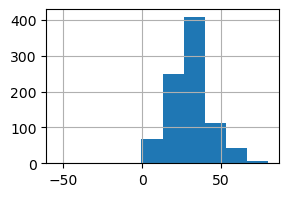

In [16]:
df['Age'].hist(figsize=(3,2))

In [17]:
age_filter = list(df[df['Age']<0]['Age'])

In [18]:
# Calculate the mode of the 'Sex' column
sex_mode = df['Sex'].mode()[0]
pclass_mode = df['Pclass'].mode()[0]

# Replace known incorrect values
df['Sex'] = df['Sex'].replace(['F', 'Female'], 'female')
df['Sex'] = df['Sex'].replace(['r','male '], sex_mode)
df['Pclass'] = df['Pclass'].replace([-999], pclass_mode)
df['Age'] = df['Age'].replace(age_filter, 54)



In [19]:
print(df['Sex'].unique())
print(df['Pclass'].unique())


['male' 'female']
[3, 1, 2]
Categories (3, int64): [1, 2, 3]


## 📊  Visualize Data
🎯 **Purpose:** Understand data distribution, detect outliers and skewness.

🔧 **What we used:**  
- `sns.histplot()` with KDE curve  
- `df.select_dtypes()` to filter numeric columns

🧠 **Why this is useful:**  
Before applying transformations or removing outliers, it’s important to visually inspect the shape of the data.

🛠️ **Other options:**  
- `sns.boxplot()` → shows outliers clearly  
- `df.plot.hist()` or `df.plot.box()`  
- `sns.pairplot()` → explore relationships between numeric features

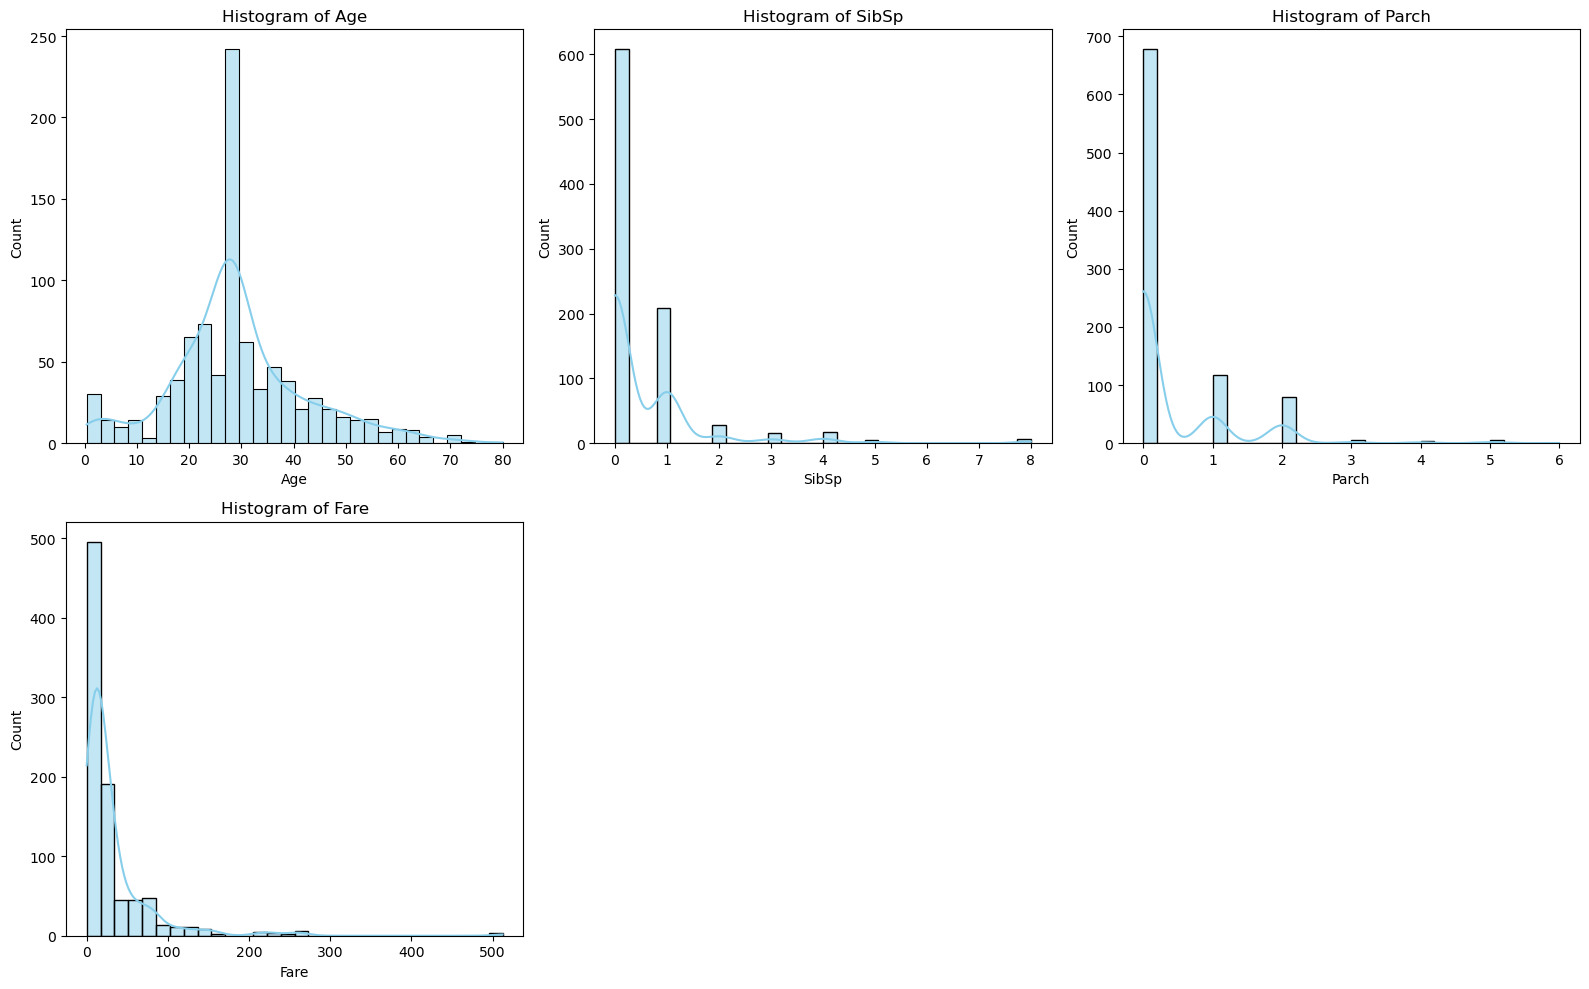

In [20]:
# 1. Select all numeric features
numeric_features = df.select_dtypes(include=['int64', 'float64']).drop('PassengerId',axis=1)

# 2. Plot histograms
plt.figure(figsize=(16, 10))
for i, column in enumerate(numeric_features.columns, 1):
    plt.subplot(2, 3, i)  # Adjust the grid size based on number of features
    sns.histplot(numeric_features[column], kde=True, bins=30, color='skyblue')
    plt.title(f'Histogram of {column}')
    plt.tight_layout()

plt.show()


In [21]:
df.columns

Index(['PassengerId', 'Name', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Embarked', 'Survived'],
      dtype='object')

In [22]:
print(df.Ticket.nunique())

681


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Name         891 non-null    object  
 2   Pclass       891 non-null    category
 3   Sex          891 non-null    object  
 4   Age          891 non-null    float64 
 5   SibSp        891 non-null    int64   
 6   Parch        891 non-null    int64   
 7   Ticket       891 non-null    object  
 8   Fare         891 non-null    float64 
 9   Embarked     891 non-null    object  
 10  Survived     891 non-null    category
dtypes: category(2), float64(2), int64(3), object(4)
memory usage: 71.6+ KB


In [24]:
# Plot categorical features 
cat_features = df.select_dtypes(include=['object']).drop(["Name","Ticket"],axis=1)
cat_features


Sex Embarked
0      male        S
1    female        C
2    female        S
3    female        S
4      male        S
..      ...      ...
886    male        S
887  female        S
888  female        S
889    male        C
890    male        Q

[891 rows x 2 columns]

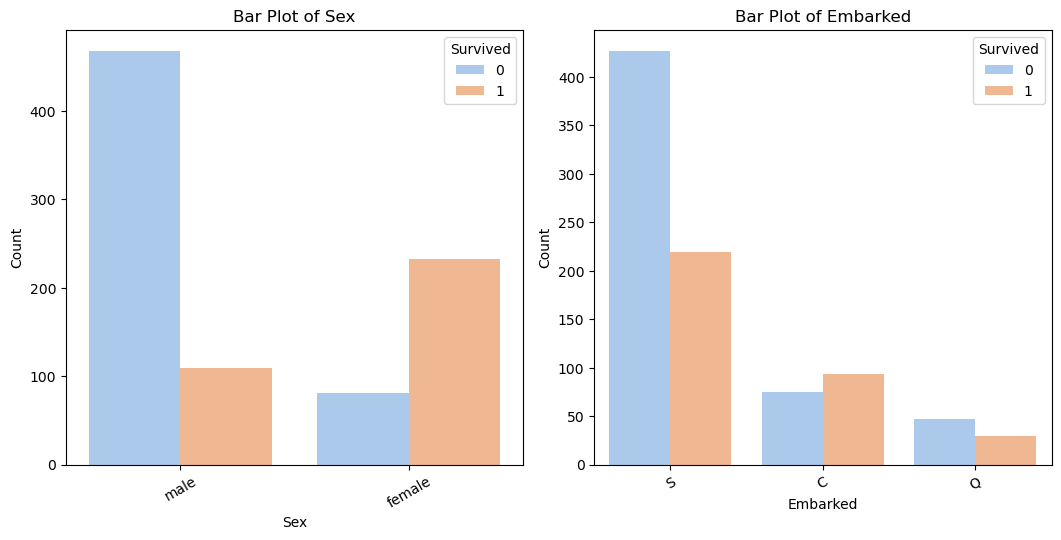

In [25]:
# 1. Select categorical features (excluding 'Name' and 'Ticket')
cat_features = df.select_dtypes(include='object').drop(["Name", "Ticket"], axis=1)

# 2. Plot bar plots using subplots
plt.figure(figsize=(16, 10))

for i, column in enumerate(cat_features.columns, 1):
    plt.subplot(2, 3, i)  # Adjust the grid size (2 rows, 3 columns)
    sns.countplot(data=df, x=column, hue='Survived', palette='pastel')
    plt.title(f'Bar Plot of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=30)
    plt.tight_layout()

plt.show()


In [26]:
df.columns

Index(['PassengerId', 'Name', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Embarked', 'Survived'],
      dtype='object')

In [27]:
df.head()

PassengerId                                               Name Pclass  \
0            1                            Braund, Mr. Owen Harris      3   
1            2  Cumings, Mrs. John Bradley (Florence Briggs Th...      1   
2            3                             Heikkinen, Miss. Laina      3   
3            4       Futrelle, Mrs. Jacques Heath (Lily May Peel)      1   
4            5                           Allen, Mr. William Henry      3   

      Sex   Age  SibSp  Parch            Ticket     Fare Embarked Survived  
0    male  22.0      1      0         A/5 21171   7.2500        S        0  
1  female  38.0      1      0          PC 17599  71.2833        C        1  
2  female  26.0      0      0  STON/O2. 3101282   7.9250        S        1  
3  female  35.0      1      0            113803  53.1000        S        1  
4    male  35.0      0      0            373450   8.0500        S        0

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Name         891 non-null    object  
 2   Pclass       891 non-null    category
 3   Sex          891 non-null    object  
 4   Age          891 non-null    float64 
 5   SibSp        891 non-null    int64   
 6   Parch        891 non-null    int64   
 7   Ticket       891 non-null    object  
 8   Fare         891 non-null    float64 
 9   Embarked     891 non-null    object  
 10  Survived     891 non-null    category
dtypes: category(2), float64(2), int64(3), object(4)
memory usage: 71.6+ KB


## 🏷️ Encode Categorical Variables

🎯 **Purpose:** Machine learning models can’t directly process text or category values.

🔧 **What we used:**  
- `pd.get_dummies()` to apply **One-Hot Encoding** for `Sex` and `Embarked`

🧠 **Why this is useful:**  
One-hot encoding turns categories into binary columns, which models can understand.

🛠️ **Other options:**  
- **Label Encoding** → assign integer values (good for ordinal features)  
- **Ordinal Encoding** → when categories have a natural order  
- **Target Encoding** → use mean of target variable per category   
- Use `sklearn.preprocessing` encoders like `OneHotEncoder` or `OrdinalEncoder`


In [29]:
print(df['Sex'].unique())
print(df['Embarked'].unique())


['male' 'female']
['S' 'C' 'Q']


In [30]:
# One-hot encode both 'Embarked' and 'Sex'
dummies = pd.get_dummies(df[['Embarked', 'Sex']], drop_first=True)

# Concatenate the new dummy columns with the original DataFrame
df = pd.concat([df.drop(['Embarked', 'Sex'], axis=1), dummies], axis=1)


In [31]:
df.head()

PassengerId                                               Name Pclass  \
0            1                            Braund, Mr. Owen Harris      3   
1            2  Cumings, Mrs. John Bradley (Florence Briggs Th...      1   
2            3                             Heikkinen, Miss. Laina      3   
3            4       Futrelle, Mrs. Jacques Heath (Lily May Peel)      1   
4            5                           Allen, Mr. William Henry      3   

    Age  SibSp  Parch            Ticket     Fare Survived  Embarked_Q  \
0  22.0      1      0         A/5 21171   7.2500        0           0   
1  38.0      1      0          PC 17599  71.2833        1           0   
2  26.0      0      0  STON/O2. 3101282   7.9250        1           0   
3  35.0      1      0            113803  53.1000        1           0   
4  35.0      0      0            373450   8.0500        0           0   

   Embarked_S  Sex_male  
0           1         1  
1           0         0  
2           1         0  
3           1         0  
4           1         1

## 🚨 Removing Outliers using IQR

🎯 **Purpose:** Outliers can distort the scale of data, affect statistical metrics and mislead machine learning models.

🔧 **What we used:**  
- IQR (Interquartile Range) method to filter out values outside 1.5 × IQR

🧠 **Why this is useful:**  
Outliers can skew the results of many models, especially those based on distance (e.g., KNN, linear regression).

🛠️ **Other options:**  
- **Z-score method** → remove values with z-score > 3  
- **Isolation Forest** or **LOF (Local Outlier Factor)**  
- **Domain-based rules** → e.g., max age = 100


In [32]:
def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # Filter the dataset
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# Select numeric features (again if needed)
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Remove outliers
df = remove_outliers_iqr(df, numeric_cols)


## 📉 Handle Skewed Features


🎯 **Purpose:** Skewed data can reduce model performance, especially for linear models.

🔧 **What we used:**  
- applied log function on `Fare`

🧠 **Why this is useful:**  
Normalizing skewed data can improve the stability and performance of algorithms.

🛠️ **Other options:**  
- `np.sqrt()` or `np.cbrt()` → less aggressive than log  
- `Box-Cox` or `Yeo-Johnson` transformations (via `sklearn`)  
- Leave as-is for tree-based models (they’re robust to skew)


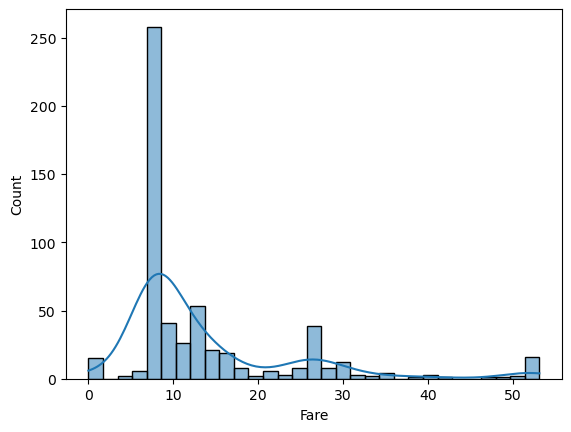

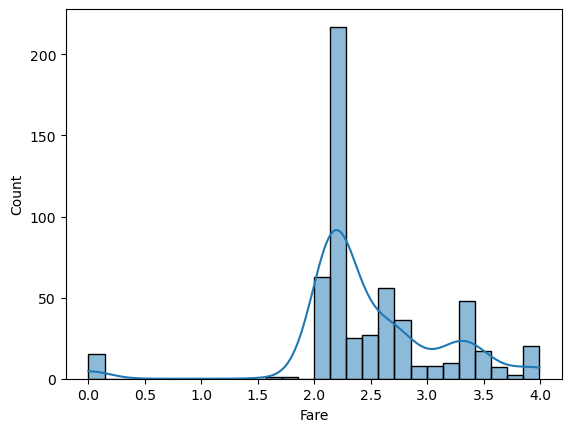

In [33]:
sns.histplot(df['Fare'], kde=True)
plt.show()

# Log transformation
df['Fare'] = df['Fare'].apply(lambda x: np.log(x + 1))
sns.histplot(df['Fare'], kde=True)
plt.show()

## ⚖️ Scale / Normalize the Data

🎯 **Purpose:** Many machine learning algorithms (especially distance-based ones) require features on the same scale.

🔧 **What we used:**  
- `StandardScaler` from `sklearn.preprocessing` (z-score standardization)

🧠 **Why this is useful:**  
Scaling prevents features with large ranges (like `Fare`) from dominating models.

🛠️ **Other options:**  
- `MinMaxScaler` → scales data to [0, 1] (useful for image data or neural networks)  
- `RobustScaler` → resistant to outliers (uses IQR instead of mean/std)  
- `Normalizer` → scales each row to unit norm (for text or cosine similarity)

📌 **When to use what:**  
- Use **StandardScaler** for models assuming normal distribution (e.g., SVM, Logistic Regression)  
- Use **MinMaxScaler** when bounded range is needed (e.g., image pixels)  
- Use **RobustScaler** when outliers are present

This step only matters if we are going to deal with algorithms that support calculating distances or make function approximation to make predictions.

Some models can skip this step like tree-based models e.g. `Decision Tree` and `Random Forest`

In [34]:
scaler = StandardScaler()
df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])
df[['Age', 'Fare']].describe()

Age          Fare
count  5.610000e+02  5.610000e+02
mean  -9.499234e-17  6.649464e-17
std    1.000892e+00  1.000892e+00
min   -2.858623e+00 -3.775895e+00
25%   -6.115683e-01 -4.758622e-01
50%   -1.385041e-01 -3.619274e-01
75%    3.345601e-01  4.415652e-01
max    2.936413e+00  2.287848e+00

## 🧠 Feature Selection

🎯 **Purpose:** Reduce dimensionality, improve model performance, and eliminate irrelevant/noisy features.

🔧 **What we used:**  
- Removed features like `Name`, `Ticket`, `Cabin`, `PassengerId`

🧠 **Why this is useful:**  
Unnecessary features can introduce noise and reduce generalization.

🛠️ **Other options:**  
- **Correlation matrix** → drop highly correlated variables (to avoid multicollinearity for function approximation models)
- **Model-based selection** → using feature importance from tree models  
- **Univariate selection** → e.g., `SelectKBest()`  
- **Recursive Feature Elimination (RFE)**


In [35]:
X = df.drop(['Survived', 'Name', 'Ticket', 'PassengerId'], axis=1)
y = df['Survived'].astype('int')

selector = SelectKBest(score_func=f_classif, k=5)
X_new = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]
print("Selected Features:", selected_features)

Selected Features: Index(['Pclass', 'Fare', 'Embarked_Q', 'Embarked_S', 'Sex_male'], dtype='object')


/home/aya/miniconda3/envs/mlflow/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [3] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/aya/miniconda3/envs/mlflow/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


## ⚖️ Handle Imbalanced Data

🎯 **Purpose:** When one class is much more frequent than another, models can become biased toward the majority.

🔧 **What we used:**  
- `SMOTE` (Synthetic Minority Over-sampling Technique) to balance the classes

🧠 **Why this is useful:**  
A balanced dataset improves classification accuracy and fairness for all classes.

🛠️ **Other options:**  
- **Random oversampling/undersampling**  
- **Class weights** → tell the model to care more about minority class  
- **ADASYN, Borderline-SMOTE** → variations of SMOTE  
- **Ensemble methods** → like balanced bagging or boosting


<AxesSubplot:ylabel='Survived'>

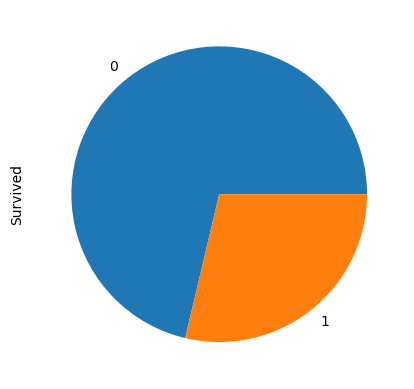

In [36]:
df['Survived'].value_counts().plot(kind="pie")

In [37]:
df_majority = df[df.Survived == 0]
df_minority = df[df.Survived == 1]

df_minority_upsampled = resample(df_minority,
                                 replace=True,
                                 n_samples=len(df_majority),
                                 random_state=42)

df_balanced = pd.concat([df_majority, df_minority_upsampled])
df_balanced['Survived'].value_counts()

0    400
1    400
Name: Survived, dtype: int64

Upsampling only copies data from the minor class to make both classes equal but there is another smarter way called `SMOTE`.

It creates synthetic data by using interpolation.

In [38]:
# Before using SMOTE you need to separate features from target variable first

# from imblearn.over_sampling import SMOTE

# X_resampled, y_resampled = SMOTE(random_state=42).fit_resample(X, y)


## 🔀 Data Splitting

In [39]:
X = df_balanced[selected_features]
y = df_balanced['Survived'].astype('int')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training shape:", X_train.shape)
print("Testing shape:", X_test.shape)

Training shape: (640, 5)
Testing shape: (160, 5)
